### Import Library

In [1]:
import pandas as pd
import os

### Import Data

In [2]:
df = pd.read_csv('./SalesAnalysis/Sales_Data/Sales_April_2019.csv')

files = [file for file in os.listdir('./SalesAnalysis/Sales_Data')]

allSales = pd.DataFrame()

for file in files:
    df = pd.read_csv('./SalesAnalysis/Sales_Data/' + file)
    allSales = pd.concat([allSales,df])
    
allSales.head()
    

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [3]:
all_data = pd.read_csv('./SalesAnalysis/Output/all_data.csv')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"



### Cleaning Data


#### Remove NaN

In [4]:
NaN = all_data[all_data.isna().any(axis=1)]

all_data = all_data.dropna(how='all')

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


#### Cleaning 'Or'

In [5]:
all_data = all_data [all_data['Order Date'].str[0:2] != 'Or']


#### Change all STR into INT

In [6]:
all_data['Order ID'] = all_data['Order ID'].astype('int32')
all_data['Quantity Ordered'] = all_data['Quantity Ordered'].astype('int32')
all_data['Price Each'] = all_data['Price Each'].astype('float')


# can use pd.to_numeric(xxx) if not sure what number type you want

### Add Month Column

In [7]:
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data['Month'] = all_data['Month'].astype('int32')


all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


### Add Sales Column

In [8]:
all_data['Sales'] = all_data['Quantity Ordered'] * all_data [ 'Price Each']

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


### What is the best month of sales?

In [9]:
sales_monthly = all_data.groupby(['Month']).sum()

sales_monthly

,Order ID,Quantity Ordered,Price Each,Sales
Month,,,,
1,1.421631e+09,10903.0,1.811768e+06,1.822257e+06
2,1.871053e+09,13449.0,2.188885e+06,2.202022e+06
3,2.564811e+09,17005.0,2.791208e+06,2.807100e+06
4,3.387347e+09,20558.0,3.367671e+06,3.390670e+06
5,3.345872e+09,18667.0,3.135125e+06,3.152607e+06
6,2.932976e+09,15253.0,2.562026e+06,2.577802e+06
7,3.284140e+09,16072.0,2.632540e+06,2.647776e+06
8,2.899374e+09,13448.0,2.230345e+06,2.244468e+06
9,2.948727e+09,13109.0,2.084992e+06,2.097560e+06


In [10]:
import matplotlib.pyplot as plt

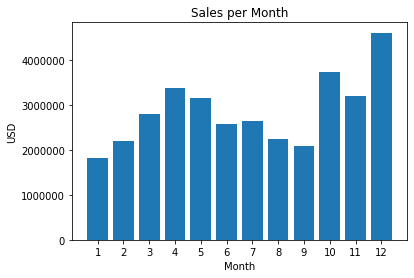

In [11]:
month = range(1,13)

plt.bar(month, sales_monthly['Sales'] )
plt.xlabel ('Month')
plt.ylabel ('USD')
plt.title ('Sales per Month')
plt.xticks (month)

plt.show()

### What City Has the Highest Number of Sales?

#### Add city column

In [12]:
#base code:
#all_data['City'] = all_data['Purchase Address'].apply(lambda x: x.split(',')[1])




def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2].split(' ')[1]

all_data['City'] = all_data['Purchase Address'].apply(lambda x: f"{get_city(x)} ({get_state(x)})")


all_data.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


In [13]:
city_sales = all_data.groupby(['City']).sum()

city_sales

,Order ID,Quantity Ordered,Price Each,Month,Sales
City,,,,,
Atlanta (GA),3.423838e+09,16602.0,2.779908e+06,104794.0,2.795499e+06
Austin (TX),2.280982e+09,11153.0,1.809874e+06,69829.0,1.819582e+06
Boston (MA),4.598265e+09,22528.0,3.637410e+06,141112.0,3.661642e+06
Dallas (TX),3.415644e+09,16730.0,2.752628e+06,104620.0,2.767975e+06
Los Angeles (CA),6.811085e+09,33289.0,5.421435e+06,208325.0,5.452571e+06
New York City (NY),5.736334e+09,27932.0,4.635371e+06,175741.0,4.664317e+06
Portland (ME),5.632663e+08,2750.0,4.471893e+05,17144.0,4.497583e+05
Portland (OR),2.305595e+09,11303.0,1.860558e+06,70621.0,1.870732e+06
San Francisco (CA),1.030444e+10,50239.0,8.211462e+06,315520.0,8.262204e+06


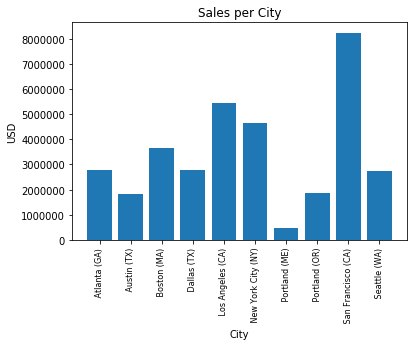

In [14]:
cities = [city for city, df in all_data.groupby('City')]

plt.bar(cities, city_sales ['Sales'] )
plt.xlabel ('City')
plt.ylabel ('USD')
plt.title ('Sales per City')
plt.xticks (cities, rotation = 'vertical', size = 8)

plt.show()

### What time should we display advertisement to maximize likelihood of customers buying product?

In [20]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])

In [21]:
all_data['Hour'] = all_data['Order Date'].dt.hour
all_data ['Minute'] = all_data['Order Date'].dt.minute
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27


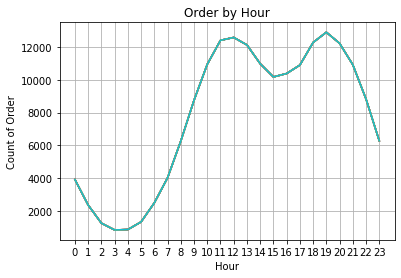

In [23]:
hours = [hour for hour, df in all_data.groupby('Hour')]



plt.plot(hours, all_data.groupby('Hour').count())

plt.grid()
plt.title('Order by Hour')
plt.xlabel('Hour')
plt.ylabel('Count of Order')
plt.xticks(hours)



plt.show()



### What product are most often sold together?

In [45]:
df = all_data[all_data['Order ID'].duplicated(keep=False)]

df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

df = df[['Order ID', 'Grouped']].drop_duplicates()

df.head()

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [48]:
from itertools import combinations
from collections import Counter


count = Counter()

for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list,2)))
    
for key, value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


#### What Product sold most? Why?

In [49]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27


<function matplotlib.pyplot.show(*args, **kw)>

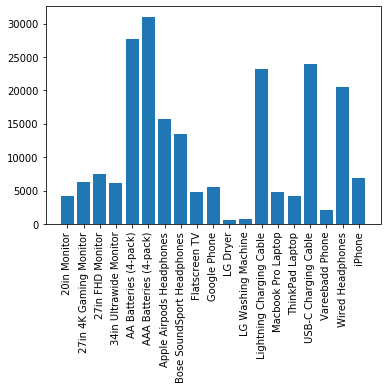

In [24]:
product_qty = all_data.groupby('Product')

quantity = product_qty.sum()['Quantity Ordered']

products = [product for product, df in product_qty['Product']]

plt.bar(products,quantity)
plt.xticks(products, rotation = 'vertical')

plt.show

In [25]:
prices = all_data.groupby('Product').mean()['Price Each']

prices.head()

Product
20in Monitor              109.99
27in 4K Gaming Monitor    389.99
27in FHD Monitor          149.99
34in Ultrawide Monitor    379.99
AA Batteries (4-pack)       3.84
Name: Price Each, dtype: float64

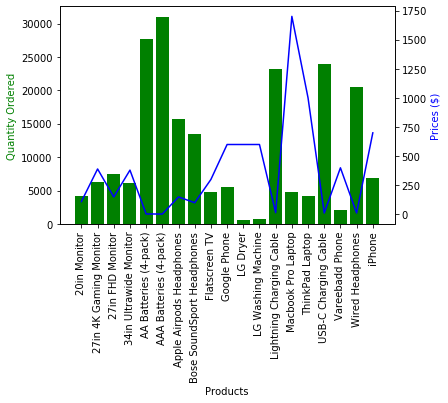

In [33]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, quantity, color = 'g')
ax2.plot(products, prices, 'b-')

ax1.set_xlabel('Products')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Prices ($)', color='b')

ax1.set_xticklabels(products, rotation = 'vertical')

plt.show()


In [36]:
import os

os.getcwd()

'C:\\Users\\admin'